### Student Information
Name: **Nguyen Anh Loc - 阮英祿**

Student ID: **109065421**

GitHub ID: **72379649**

Kaggle name: **AL Nguyen**

Kaggle private scoreboard snapshot:

![Snapshot](pics/kaggle.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

---
## Data Preparation

In [41]:
import pandas as pd

### training data
anger_train = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [42]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [43]:
### testing data
anger_test = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


---
### **<span style="color:red">Exercise 1:</span>**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [44]:
import numpy as np
import plotly.offline as py
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)

In [45]:
term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))
    
term_frequencies = np.asarray(train_counts.sum(axis=0))[0]
term_frequencies

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

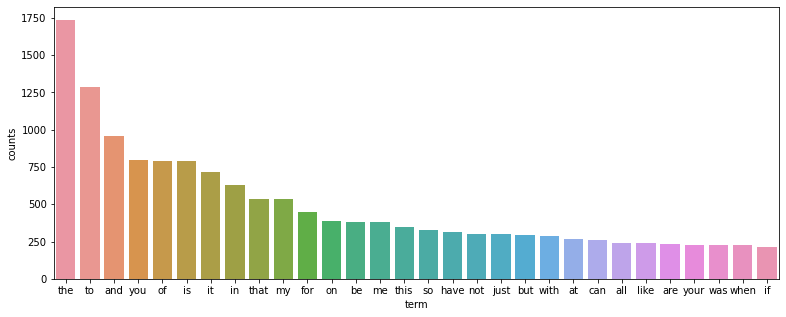

In [46]:
import seaborn as sns
g=pd.DataFrame()
g['term'] = count_vect.get_feature_names()
g['counts'] = term_frequencies

g.sort_values(by='counts',ascending=False, inplace=True)
plt.subplots(figsize=(13,5))
ax = sns.barplot(x=g.term[:30],y=g.counts[:30])
fig.show()

In [47]:
test_counts = count_vect.fit_transform(test_df.text)

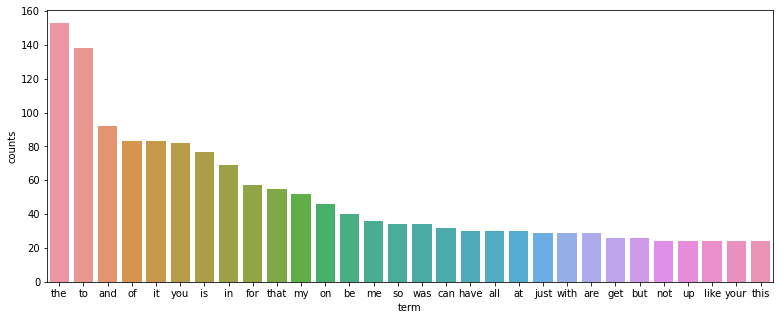

In [48]:
term_frequencies = []
for j in range(0,test_counts.shape[1]):
    term_frequencies.append(sum(test_counts[:,j].toarray()))
    
term_frequencies = np.asarray(test_counts.sum(axis=0))[0]
term_frequencies

g=pd.DataFrame()
g['term'] = count_vect.get_feature_names()
g['counts'] = term_frequencies

g.sort_values(by='counts',ascending=False, inplace=True)
plt.subplots(figsize=(13,5))
ax = sns.barplot(x=g.term[:30],y=g.counts[:30])
fig.show()

---
### **<span style="color:red">Exercise 2:</span>**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvec = TfidfVectorizer(max_features=1000)
df_tfvec = tfvec.fit_transform(train_df.text)
tfvec.get_feature_names()[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
### **<span style="color:red">Exercise 3:</span>**  
Can you interpret the results above? What do they mean?

1. The test accuracy score is not really good but it's quite acceptable enough. But there is a significant gap between train accuracy score and test accuracy score, which should be an overfitting. The model need to do some techniques to solve the overfitting problem, including pruning or other regularization techniques.
![Snapshot](pics/acc.png)

2. There is a similarity between the accuracy score and the F1 score (~0.66). Also, looking into confusion matrix also provide us an understanding of how good the classifier is, which is expected to a confusion matrix where we have values only on the diagonal.
![Snapshot](pics/report.png)
![Snapshot](pics/confusion_matrix.png)

---
### **<span style="color:red">Exercise 4:</span>**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [11]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7fed48b4b550>)

In [12]:
from sklearn.naive_bayes import MultinomialNB

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'anger', 'anger', 'sadness', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype='<U7')

In [13]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.69


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



---
### **<span style="color:red">Exercise 5:</span>**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer:**

With the number of training dataset is 3613, we can calculate the confidence interval for the true difference between 2 model at 95% confidence level: 0.03 +(-) 1.96 x 0.0110 = 0.03 +(-) 0.0216

As the interval doesn't span the value zero, we can conclude that the observed difference is statistically significant at 95% confidence level.

Overall, Naive Bayes (NB) model is better than Decision Tree (DT) model in this classification problem. The accuracy score and the F1 score of NB model are better than those of DT model (0.69 > 0.66). And NB model still has the overfitting problem but the gap between train accuracy score and test accuracy score is lower than that of DT model.
- Because one of most popular issues of DT model is easily suffering from overfitting.
- Picking which features for NB model matter is up to ourselves. Instead, DT model will pick the best features from tabular data. But in this classification problem, the list of features is the same so NB model can perform well with low amounts of data.

---
### **<span style="color:red">Exercise 6:</span>**  

Plot the Training and Validation Accuracy and Loss (different plots). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

### Prepare data (X, y)

In [15]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### Deal with categorical label (y)

In [16]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### Build model

In [17]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [18]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

### Train

In [19]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/Users/locnguyen/github/dm2020_lab2_master/logs/training_log.csv')

# training setting
epochs = 20
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/20
113/113 [==============================] - 0s 3ms/step - loss: 1.3303 - accuracy: 0.3537 - val_loss: 1.2894 - val_accuracy: 0.4669
Epoch 2/20
113/113 [==============================] - 0s 956us/step - loss: 0.9931 - accuracy: 0.6499 - val_loss: 0.9674 - val_accuracy: 0.6282
Epoch 3/20
113/113 [==============================] - 0s 995us/step - loss: 0.5822 - accuracy: 0.7952 - val_loss: 0.8365 - val_accuracy: 0.7003
Epoch 4/20
113/113 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8486 - val_loss: 0.8240 - val_accuracy: 0.6859
Epoch 5/20
113/113 [==============================] - 0s 999us/step - loss: 0.3291 - accuracy: 0.8838 - val_loss: 0.8671 - val_accuracy: 0.6830
Epoch 6/20
113/113 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9125 - val_loss: 0.8951 - val_accuracy: 0.7003
Epoch 7/20
113/113 [==============================] - 0s 1ms/step - loss: 0.2106 - accuracy: 0.9327 - val_loss: 0.9749 - val_accuracy: 0.6859


### Predict on testing data

In [20]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[3.1148497e-02, 3.4842800e-02, 8.3725625e-01, 9.6752338e-02],
       [9.9995363e-01, 3.5946901e-05, 6.2807044e-07, 9.7383218e-06],
       [3.9258707e-01, 5.5562425e-01, 5.0741926e-07, 5.1788095e-02],
       [5.7017499e-01, 3.3212162e-04, 4.2298719e-01, 6.5057524e-03],
       [3.3227626e-02, 2.1798916e-01, 3.3896945e-02, 7.1488625e-01]],
      dtype=float32)

In [21]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'fear', 'anger', 'sadness'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [23]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/Users/locnguyen/github/dm2020_lab2_master/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.353723,1.330276,0.466859,1.289436
1,1,0.649875,0.993102,0.628242,0.967387
2,2,0.795184,0.582249,0.700288,0.836488
3,3,0.848602,0.413224,0.685879,0.824033
4,4,0.883753,0.329058,0.682997,0.867132
5,5,0.912538,0.262956,0.700288,0.895123
6,6,0.932743,0.210570,0.685879,0.974882
7,7,0.943814,0.177716,0.668588,0.994275
8,8,0.953778,0.150879,0.659942,1.104377
9,9,0.958760,0.132100,0.662824,1.144656


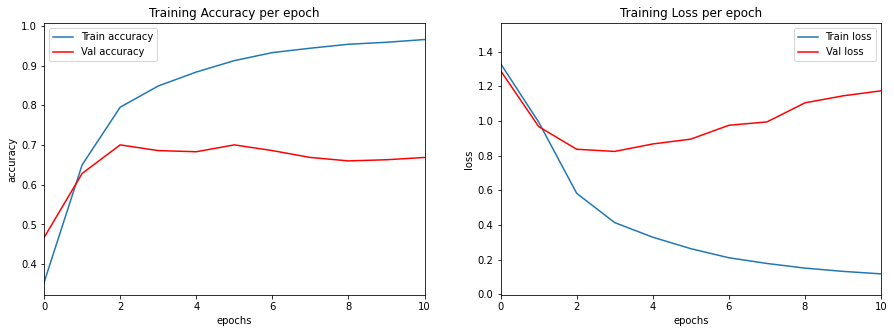

In [24]:
from matplotlib.pylab import plt

cols_1 = ['accuracy','loss']
cols_2 = ['val_accuracy','val_loss']
labs_1 = ['Train accuracy','Train loss']
labs_2 = ['Val accuracy','Val loss']
tits = ['Training Accuracy per epoch','Training Loss per epoch']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, c1, c2, l1, l2, t in zip(axes, cols_1, cols_2, labs_1, labs_2, tits):
    ax.plot(training_log.epoch, training_log[c1])
    ax.plot(training_log.epoch, training_log[c2], color='red')
    ax.set_xlim(0,10)
    ax.legend([l1,l2])
    ax.set_xlabel('epochs')
    ax.set_ylabel(c1)
    ax.set_title(t)
plt.show()

From the 1st charts, we can see that the model has a strong overfitting problem. The gap between training and validation accuracy in this chart is a clear indication of overfitting because it widens over the training process while the training accuracy is too high but the model doesn't fit the validation dataset. Also, the lower the loss, the better a model.

---
### **<span style="color:red">Exercise 7:</span>**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Prepare training corpus

In [25]:
import gensim
import warnings
warnings.filterwarnings('ignore')
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [26]:
train_df.shape

(3613, 5)

### Fitting Word2Vec

In [27]:
from gensim.models import Word2Vec
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

word2vec_model = Word2Vec(sentences=train_df['text_tokenized'].values, size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [28]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('.\\nA', 0.9524439573287964),
 ("'you", 0.9496451616287231),
 ('Be', 0.9480491876602173),
 ('keeping', 0.9444384574890137),
 ('plz', 0.9433538317680359),
 ('help', 0.9388433694839478),
 ('ukedchat', 0.9385412931442261),
 ('muslims', 0.9376059770584106),
 ('cry', 0.9369141459465027),
 ('free', 0.93663489818573)]

In [29]:
def make_feature_vec(words, model, vector_dim):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((vector_dim,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0.
    index2word_set = set(model.wv.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec,model[word])
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec


def get_avg_feature_vecs(comments, model, vector_dim):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0
    review_feature_vecs = np.zeros((len(comments),vector_dim), dtype='float32')  # pre-initialize (for speed)
    
    for comment in comments:
        review_feature_vecs[counter] = make_feature_vec(comment, model, vector_dim)
        counter = counter + 1
    return review_feature_vecs

In [30]:
# calculate average feature vectors for training and test sets
trainDataVecs = get_avg_feature_vecs(train_df.text_tokenized.to_list(), word2vec_model, vector_dim)
trainDataVecs[0:2]

array([[-0.01226825,  0.16698587,  0.00504344,  0.005872  , -0.39242977,
         0.34361824, -0.3522429 ,  0.28017634, -0.826412  ,  0.5982681 ,
        -0.15188174,  0.69933885, -0.33662108, -0.14304128, -0.11007351,
        -0.17767595,  0.8202446 , -0.41946283, -0.4640507 , -0.40513825,
        -0.16645065,  0.4979311 , -0.4128587 , -0.5212277 , -0.35182238,
         0.4074022 , -0.69020647,  0.59396696, -0.2911466 , -0.6148123 ,
        -0.4617424 , -0.6862196 , -0.0132926 ,  0.16280779,  0.16275503,
        -0.24188904, -0.4532369 ,  1.3019068 , -0.8342756 ,  0.11115294,
         0.19554831, -0.97252166, -0.01475312,  0.13117443,  0.0673911 ,
         0.20058717,  0.06546462, -0.10964183, -0.3464757 , -0.7567081 ,
         0.7437348 , -0.27166057,  0.23617719, -0.3573439 ,  0.2719089 ,
         0.2473651 , -0.15165575,  0.68159825,  0.28385782, -0.06422071,
         0.40562114,  0.18799642,  0.5493618 , -0.22254255, -0.08511762,
         0.04523388,  0.02127171,  0.21892929, -0.4

---
### **<span style="color:red">Exercise 8:</span>**  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

### Using a pre-trained w2v model

In [31]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/Users/locnguyen/github/dm2020_lab2_homework/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [32]:
# get the corresponding vector of a word
word_vec = w2v_google_model.wv['happy']
word_vec.shape

(300,)

### Prepare visualizing target

In [33]:
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', data_words)
print('fear_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

### Plot using t-SNE (2-dimension)

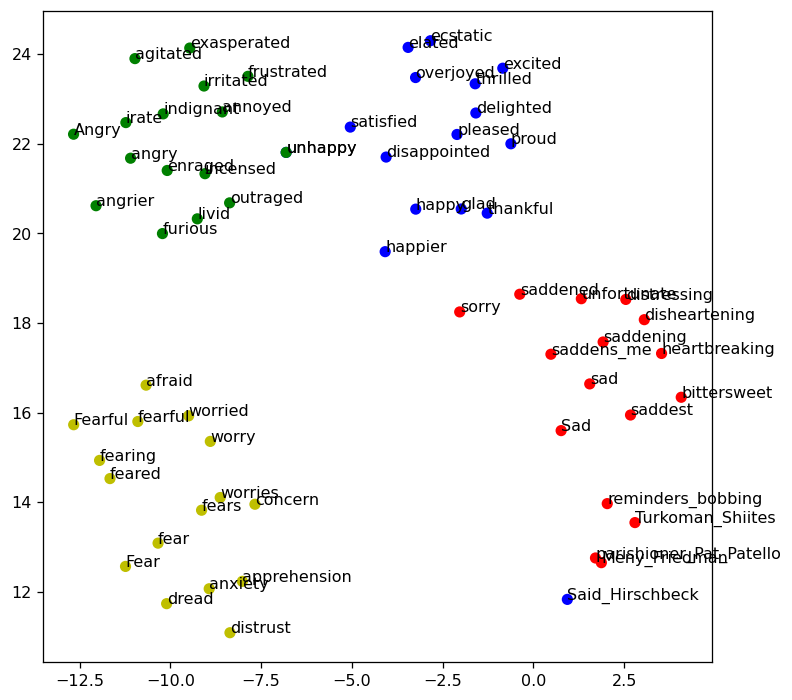

In [34]:
%matplotlib inline
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()